# Импорты

In [1]:
from logging import disable

import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint

# Анализ

In [2]:
df = pd.read_csv("proxy_metrics_homework_3.csv")

df.head()

,user_id,views,contacts,last_7_views,last_3_views,last_7_contacts,last_3_contacts,live_days,messages_events,max_views_delta,add_to_favor_events,is_bought
0,151042503,84,2,84,39,2,2,8,0,6,0.0,0
1,151212422,95,0,95,36,0,0,8,0,7,0.0,0
2,151206815,118,3,118,40,3,2,8,0,2,0.0,0
3,151284254,11,0,11,2,0,0,7,0,8,0.0,0
4,151088604,48,2,48,8,2,0,8,0,1,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              1193 non-null   int64  
 1   views                1193 non-null   int64  
 2   contacts             1193 non-null   int64  
 3   last_7_views         1193 non-null   int64  
 4   last_3_views         1193 non-null   int64  
 5   last_7_contacts      1193 non-null   int64  
 6   last_3_contacts      1193 non-null   int64  
 7   live_days            1193 non-null   int64  
 8   messages_events      1193 non-null   int64  
 9   max_views_delta      1193 non-null   int64  
 10  add_to_favor_events  1193 non-null   float64
 11  is_bought            1193 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 112.0 KB


In [5]:
print(df.is_bought.mean())

0.3403185247275775


In [6]:
df.groupby('is_bought').agg(avg_contacts=('contacts', 'mean')).reset_index()

,is_bought,avg_contacts
0,0,12.978399
1,1,24.325123


In [7]:
df_gr = df.groupby('is_bought').agg(avg_add_to_favor=('add_to_favor_events', 'mean')).reset_index()
display(df_gr)

print(df_gr['avg_add_to_favor'][1] / df_gr['avg_add_to_favor'][0])

,is_bought,avg_add_to_favor
0,0,0.158831
1,1,0.322660


2.0314679802955666


In [10]:
df_gr_0 = df.loc[df.contacts == 0].groupby('is_bought').agg(cnt_users_0=('user_id', 'nunique')).reset_index()
df_gr = df.groupby('is_bought').agg(cnt_users_all=('user_id', 'nunique')).reset_index()

df_gr = df_gr.merge(df_gr_0, on='is_bought')
df_gr['share_0'] = df_gr['cnt_users_0'] / df_gr['cnt_users_all']

display(df_gr)

,is_bought,cnt_users_all,cnt_users_0,share_0
0,0,787,81,0.102922
1,1,406,15,0.036946


In [11]:
df.groupby('is_bought')['live_days'].mean().reset_index()

,is_bought,live_days
0,0,12.722999
1,1,10.219212


In [13]:
df_gr = df.groupby(['is_bought', 'user_id']).agg(cnt_views=('views', 'sum'),
                                    cnt_contacts=('contacts', 'sum')).reset_index()

df_gr['share'] = df_gr['cnt_contacts'] / df_gr['cnt_views']

for group in df_gr.is_bought.unique():
    print(f"{group} - {df_gr[df_gr['is_bought']==group]['share'].mean()}")

0 - 0.022825099781612665
1 - 0.03421006944101362


## Поиск корреляции:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              1193 non-null   int64  
 1   views                1193 non-null   int64  
 2   contacts             1193 non-null   int64  
 3   last_7_views         1193 non-null   int64  
 4   last_3_views         1193 non-null   int64  
 5   last_7_contacts      1193 non-null   int64  
 6   last_3_contacts      1193 non-null   int64  
 7   live_days            1193 non-null   int64  
 8   messages_events      1193 non-null   int64  
 9   max_views_delta      1193 non-null   int64  
 10  add_to_favor_events  1193 non-null   float64
 11  is_bought            1193 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 112.0 KB


In [4]:
df.describe()

,user_id,views,contacts,last_7_views,last_3_views,last_7_contacts,last_3_contacts,live_days,messages_events,max_views_delta,add_to_favor_events,is_bought
count,1.193000e+03,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000
mean,1.495692e+08,829.428332,16.839899,428.116513,205.514669,10.139983,5.585080,11.870914,13.616094,23.056161,0.214585,0.340319
std,4.548292e+06,1257.705130,27.065953,528.013474,300.981384,15.199391,9.229894,9.503360,20.829005,58.328013,1.219619,0.474015
min,1.023619e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-10.000000,0.000000,0.000000
25%,1.502742e+08,173.000000,3.000000,137.000000,43.000000,2.000000,0.000000,7.000000,2.000000,1.000000,0.000000,0.000000
50%,1.510287e+08,409.000000,8.000000,260.000000,103.000000,5.000000,2.000000,8.000000,7.000000,4.000000,0.000000,0.000000
75%,1.512462e+08,909.000000,21.000000,528.000000,229.000000,12.000000,7.000000,15.000000,16.000000,12.000000,0.000000,1.000000
max,1.517013e+08,17394.000000,476.000000,7407.000000,2462.000000,232.000000,103.000000,43.000000,287.000000,515.000000,19.000000,1.000000


In [6]:
df.head()

,user_id,views,contacts,last_7_views,last_3_views,last_7_contacts,last_3_contacts,live_days,messages_events,max_views_delta,add_to_favor_events,is_bought
0,151042503,84,2,84,39,2,2,8,0,6,0.0,0
1,151212422,95,0,95,36,0,0,8,0,7,0.0,0
2,151206815,118,3,118,40,3,2,8,0,2,0.0,0
3,151284254,11,0,11,2,0,0,7,0,8,0.0,0
4,151088604,48,2,48,8,2,0,8,0,1,0.0,0


In [35]:
def find_cat_quant_correlation(quant_value, binary_mask, plot=True,
                               print_inference=True):
    """
    :param quant_value - количественная переменная,  для которой считаем корреляцию
    :param binary_mask - бинарная переменная (True, False), для которой считаем корреляцию
    :param plot - надо ли отрисовывать график
    :param print_inference - надо ли принтовать выводы и основные метркии
    """
    # разбиваем количественную метрику на группы по тому, была ли целевая конверсия или нет

    group_1 = quant_value[binary_mask] # binary = 1
    group_2 = quant_value[~binary_mask] # binary = 0

    # считаем pointbiserial корреляцию, тест Краскелла-Уолесса и обычный Т-тест
    pointbiserialr = ss.pointbiserialr(quant_value, binary_mask)[0]
    kruskal_pval = ss.kruskal(group_1, group_2)[1]
    ttest_pval = ss.ttest_ind(group_1, group_2)[1]
    # принтуем выводы
    if print_inference:
        print('Mean quant value for group (binary=1) =', group_1.mean())
        print('Mean quant value for group (binary=0) =', group_2.mean())

        print('Median quant value for group (binary=1) =', group_1.median())
        print('Median quant value for group (binary=0) =', group_2.median())

        print('Kruskal-Wallis H Test p-value =', kruskal_pval)
        print('T-test p-value =', ttest_pval)
        print('point biserial correlation =', pointbiserialr)

       # рисуем график распределения для двух групп, чтобы проиллюстрировать различия в группах
    if plot:
        plt.figure(figsize=(16, 6))
        sns.kdeplot(group_1, color = 'red', label = 'Binary = True')
        sns.kdeplot(group_2, color = 'blue', label = 'Binary = False')
        plt.axvline(x = group_1.mean(), linestyle='--', color = 'red')
        plt.axvline(x = group_2.mean(), linestyle='--', color = 'blue')
        plt.legend()

    return({'point biserial R':pointbiserialr,
        'kruskal_pval':kruskal_pval,
        'ttest_pval':ttest_pval})


Корреляция is_bought с views
Mean quant value for group (binary=1) = 1021.3300492610838
Mean quant value for group (binary=0) = 730.4294790343075
Median quant value for group (binary=1) = 503.0
Median quant value for group (binary=0) = 368.0
Kruskal-Wallis H Test p-value = 5.306506101608646e-05
T-test p-value = 0.00014804706494022448
point biserial correlation = 0.10963715907458789

Корреляция is_bought с contacts
Mean quant value for group (binary=1) = 24.32512315270936
Mean quant value for group (binary=0) = 12.978398983481576
Median quant value for group (binary=1) = 12.0
Median quant value for group (binary=0) = 6.0
Kruskal-Wallis H Test p-value = 5.543069998568086e-19
T-test p-value = 4.338095464836777e-12
point biserial correlation = 0.198718918257596

Корреляция is_bought с last_7_views
Mean quant value for group (binary=1) = 581.0812807881773
Mean quant value for group (binary=0) = 349.2045743329098
Median quant value for group (binary=1) = 364.5
Median quant value for group (

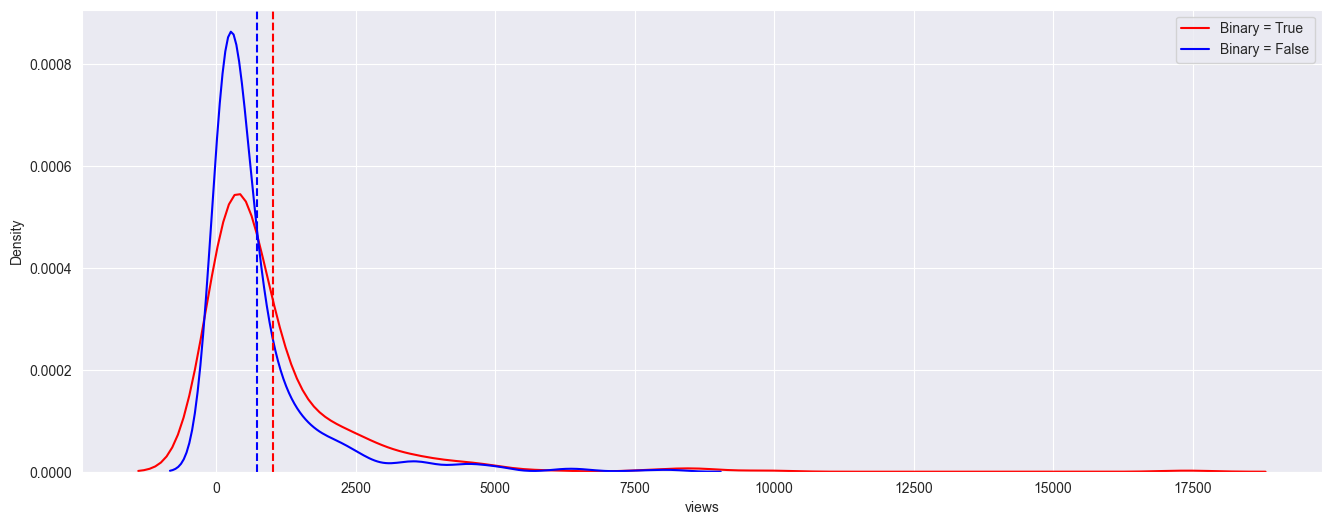

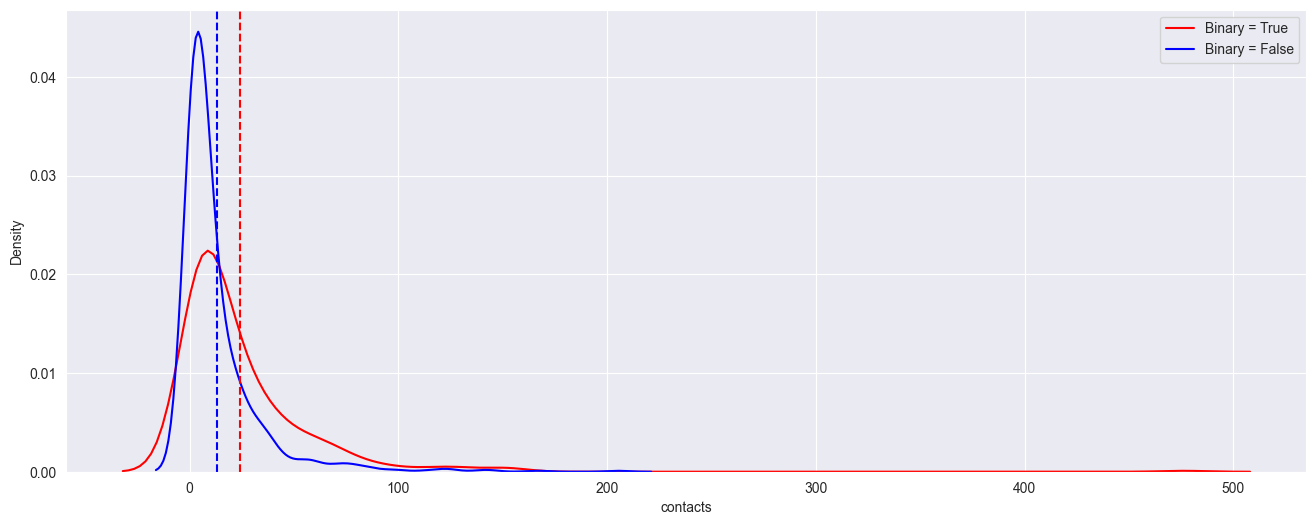

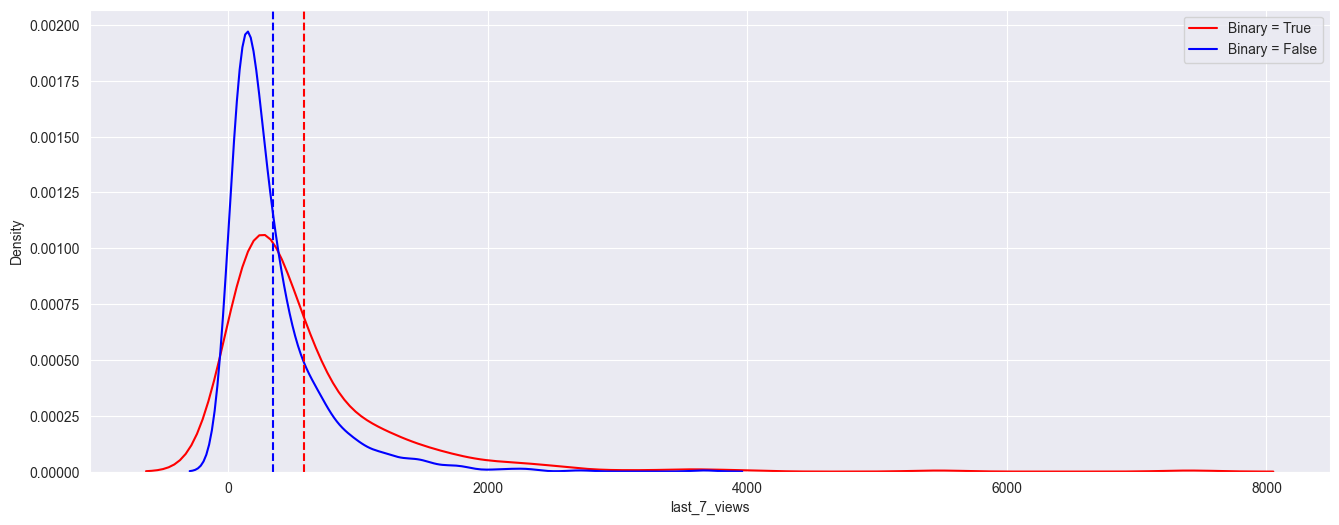

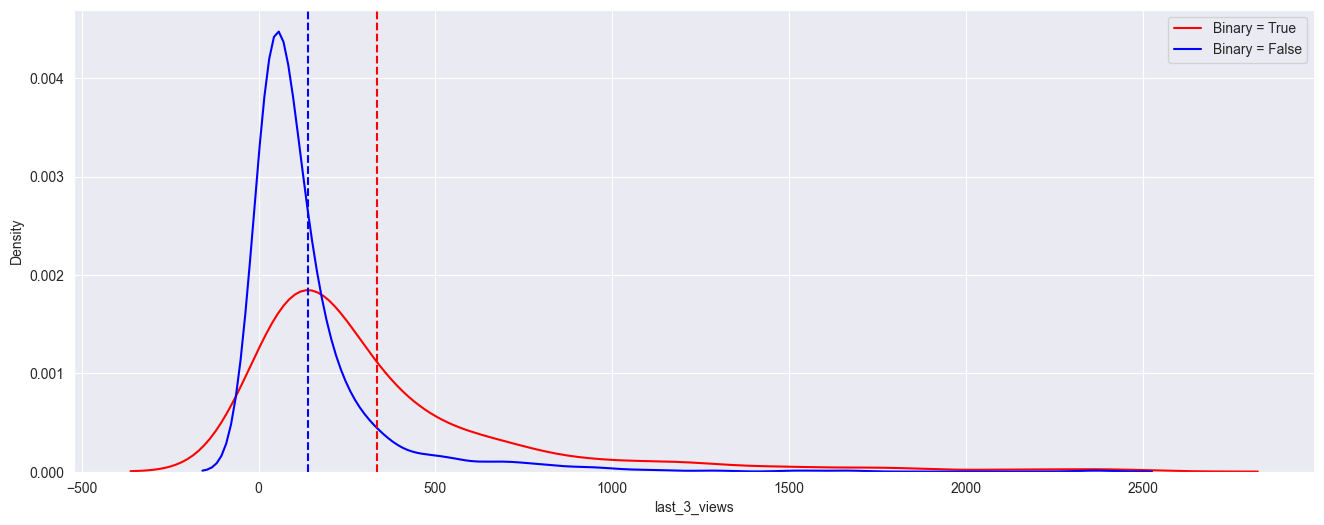

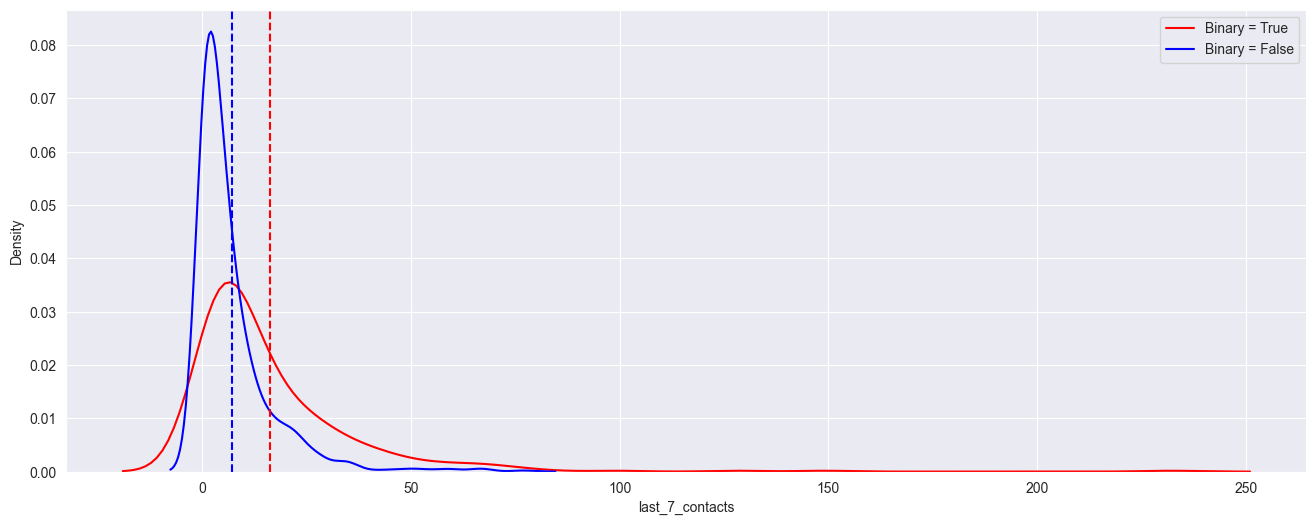

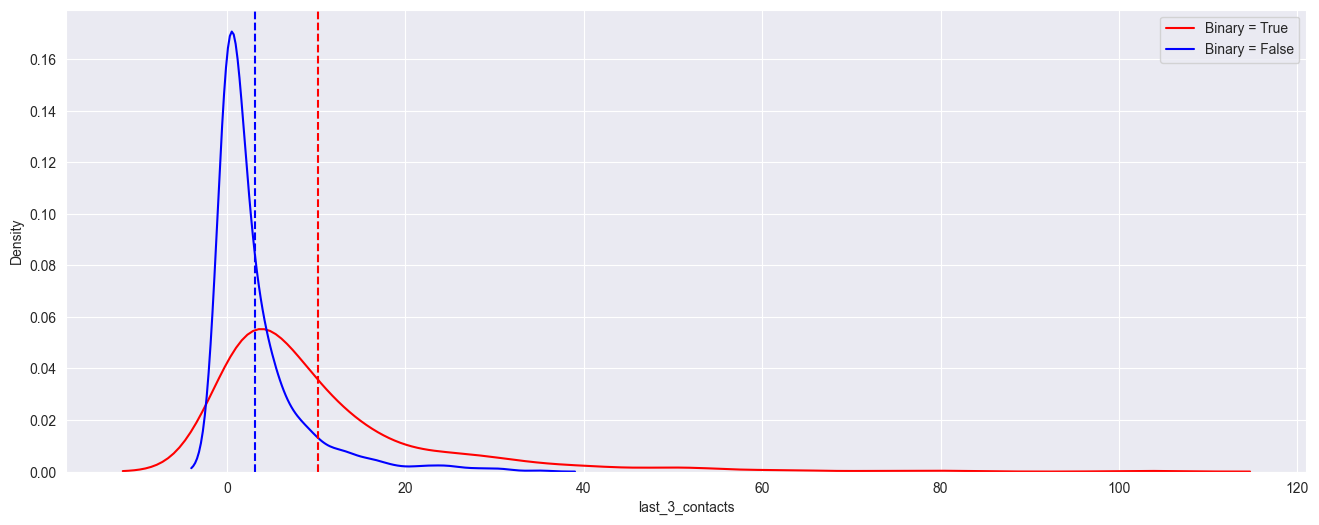

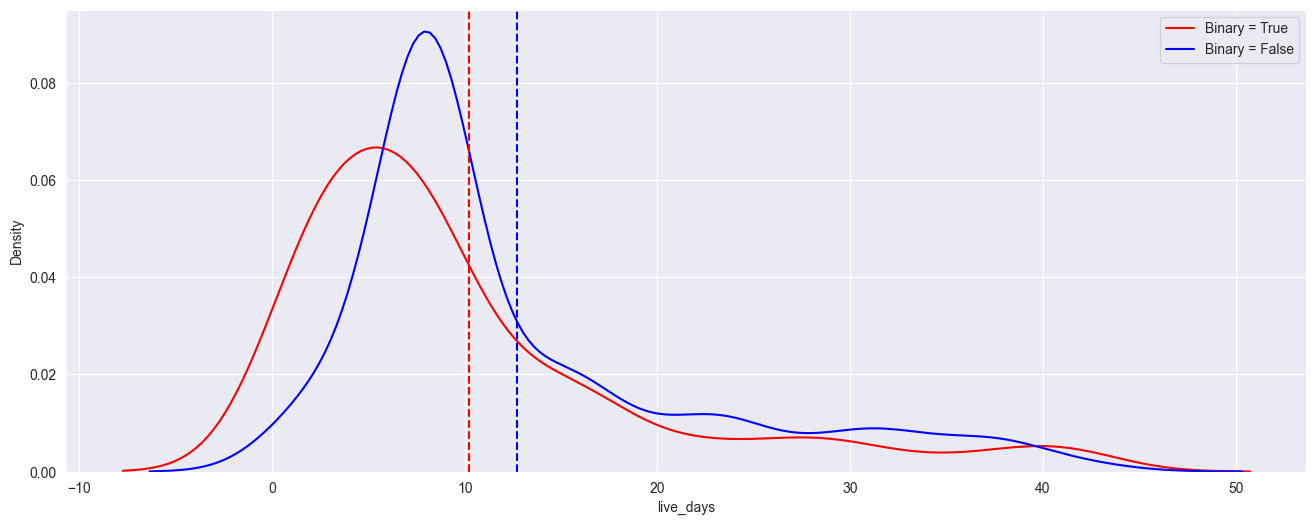

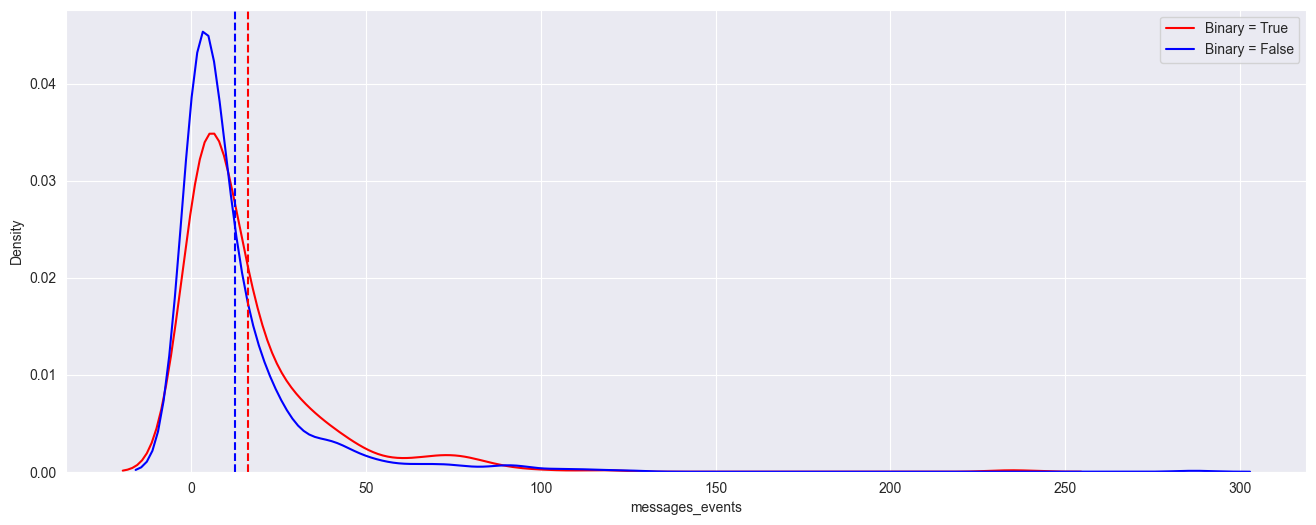

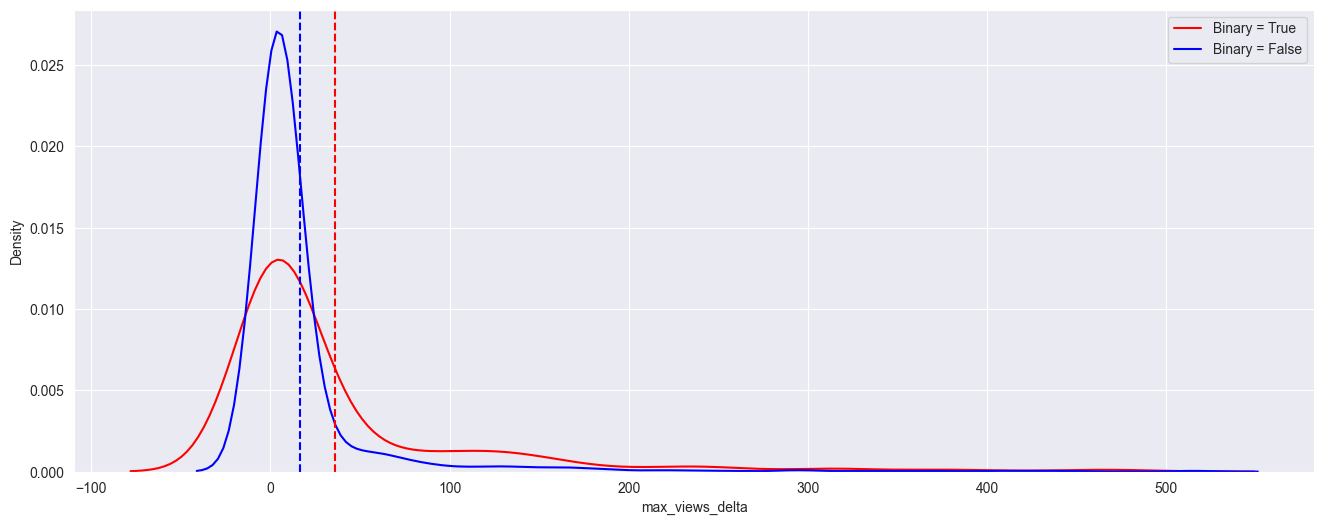

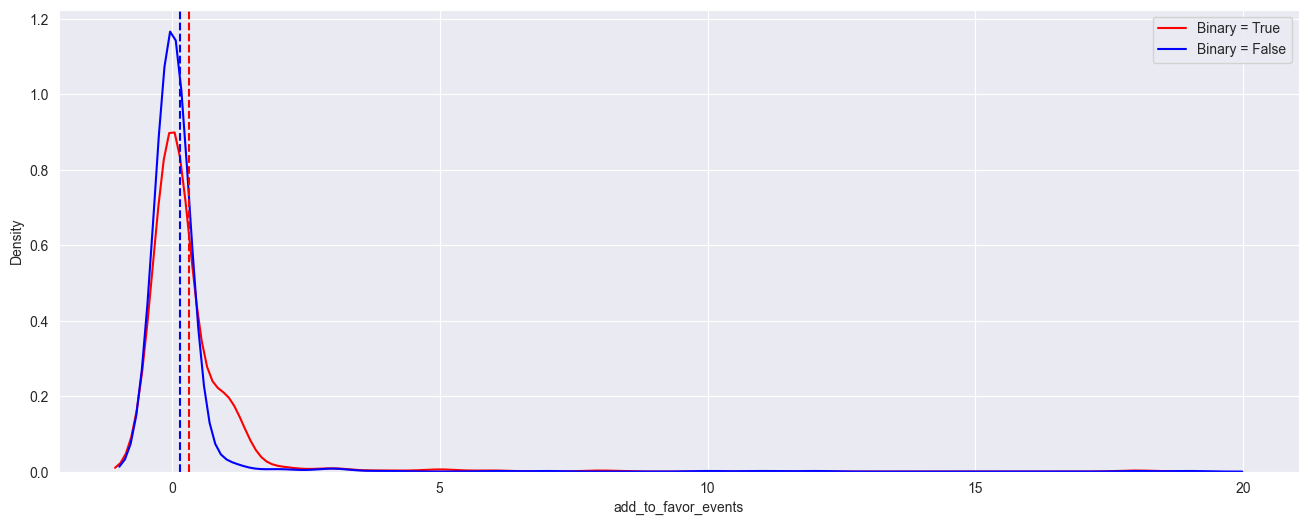

In [36]:
pb_corr = []
metrics = df.columns.tolist()[1:-1]
goal_metric = df.columns.tolist()[-1]
for metric in metrics:
    print(f"\nКорреляция {goal_metric} с {metric}")
    pb_corr.append({metric: find_cat_quant_correlation(quant_value=df[metric],
                                               binary_mask=df[goal_metric] == 1,
                                               plot=True,
                                               print_inference=True)})

In [37]:
df.columns.tolist()[1:-1]

['views',
 'contacts',
 'last_7_views',
 'last_3_views',
 'last_7_contacts',
 'last_3_contacts',
 'live_days',
 'messages_events',
 'max_views_delta',
 'add_to_favor_events']

In [38]:
pb_corr

[{'views': {'point biserial R': np.float64(0.10963715907458789),
   'kruskal_pval': np.float64(5.306506101608646e-05),
   'ttest_pval': np.float64(0.00014804706494022448)}},
 {'contacts': {'point biserial R': np.float64(0.198718918257596),
   'kruskal_pval': np.float64(5.543069998568086e-19),
   'ttest_pval': np.float64(4.338095464836777e-12)}},
 {'last_7_views': {'point biserial R': np.float64(0.20816329384785667),
   'kruskal_pval': np.float64(8.991523769954606e-13),
   'ttest_pval': np.float64(3.811776107097942e-13)}},
 {'last_3_views': {'point biserial R': np.float64(0.3112803930747102),
   'kruskal_pval': np.float64(1.7667452180529188e-35),
   'ttest_pval': np.float64(3.231466116846174e-28)}},
 {'last_7_contacts': {'point biserial R': np.float64(0.28483383958689656),
   'kruskal_pval': np.float64(2.187389457336492e-29),
   'ttest_pval': np.float64(1.0543457006044281e-23)}},
 {'last_3_contacts': {'point biserial R': np.float64(0.36326192660233564),
   'kruskal_pval': np.float64(2.2

In [39]:
df_new = pd.dfFrame({outer_key: inner_dict
                       for d in pb_corr
                       for outer_key, inner_dict in d.items()}).T

df_new

,point biserial R,kruskal_pval,ttest_pval
views,0.109637,5.306506e-05,1.480471e-04
contacts,0.198719,5.543070e-19,4.338095e-12
last_7_views,0.208163,8.991524e-13,3.811776e-13
last_3_views,0.311280,1.766745e-35,3.231466e-28
last_7_contacts,0.284834,2.187389e-29,1.054346e-23
last_3_contacts,0.363262,2.221558e-45,1.592043e-38
live_days,-0.124886,4.349846e-14,1.518758e-05
messages_events,0.086318,1.466459e-06,2.846538e-03
max_views_delta,0.160610,9.310520e-01,2.434716e-08
add_to_favor_events,0.063673,3.566563e-18,2.786382e-02


In [40]:
df_new.sort_values(by='point biserial R', ascending=False)

,point biserial R,kruskal_pval,ttest_pval
last_3_contacts,0.363262,2.221558e-45,1.592043e-38
last_3_views,0.311280,1.766745e-35,3.231466e-28
last_7_contacts,0.284834,2.187389e-29,1.054346e-23
last_7_views,0.208163,8.991524e-13,3.811776e-13
contacts,0.198719,5.543070e-19,4.338095e-12
max_views_delta,0.160610,9.310520e-01,2.434716e-08
views,0.109637,5.306506e-05,1.480471e-04
messages_events,0.086318,1.466459e-06,2.846538e-03
add_to_favor_events,0.063673,3.566563e-18,2.786382e-02
live_days,-0.124886,4.349846e-14,1.518758e-05


Mean quant value for group (binary=1) = 10.251231527093596
Mean quant value for group (binary=0) = 3.1778907242693775
Median quant value for group (binary=1) = 6.0
Median quant value for group (binary=0) = 1.0
Kruskal-Wallis H Test p-value = 2.2215577772866467e-45
T-test p-value = 1.5920434623505875e-38
point biserial correlation = 0.36326192660233564


{'point biserial R': np.float64(0.36326192660233564),
 'kruskal_pval': np.float64(2.2215577772866467e-45),
 'ttest_pval': np.float64(1.5920434623505875e-38)}

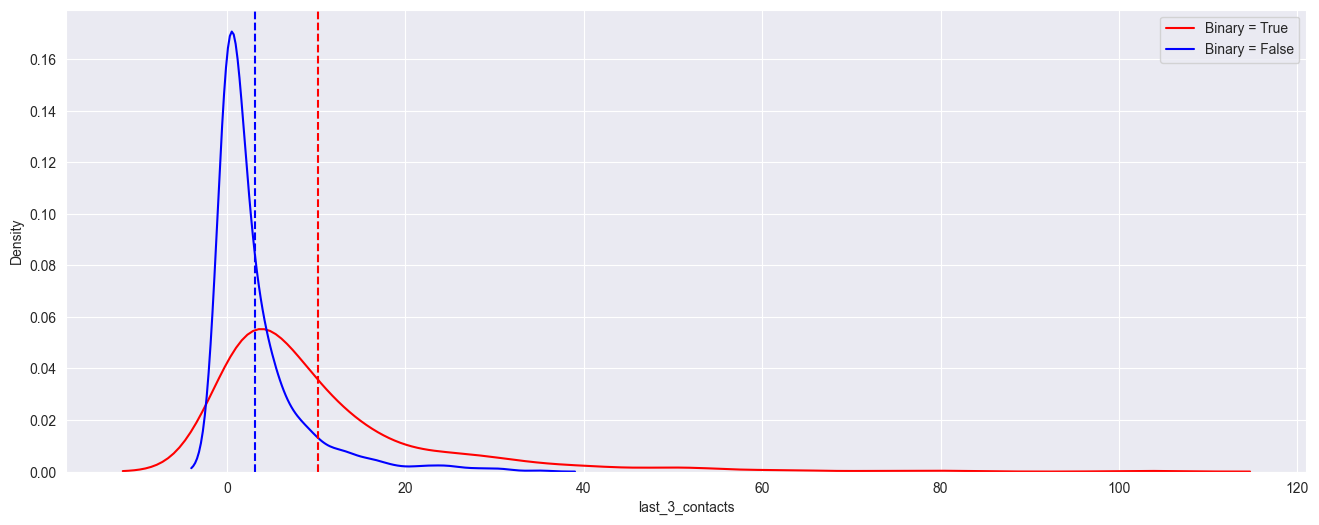

In [41]:
find_cat_quant_correlation(quant_value=df['last_3_contacts'],
                                               binary_mask=df[goal_metric] == 1,
                                               plot=True,
                                               print_inference=True)

Корреляция is_bought с views

Mean quant value for group (binary=1) = 6.20797329109413
Mean quant value for group (binary=0) = 5.891042622300389
Median quant value for group (binary=1) = 6.222574299687549
Median quant value for group (binary=0) = 5.910796644040527
Kruskal-Wallis H Test p-value = 5.306506101608646e-05
T-test p-value = 2.8817703698576215e-05
point biserial correlation = 0.12077843142477374
Корреляция is_bought с contacts

Mean quant value for group (binary=1) = 2.621626730765931
Mean quant value for group (binary=0) = 1.9647865738535728
Median quant value for group (binary=1) = 2.5649493574615367
Median quant value for group (binary=0) = 1.9459101490553132
Kruskal-Wallis H Test p-value = 5.543069998568086e-19
T-test p-value = 6.240407228686363e-20
point biserial correlation = 0.2603217975063432
Корреляция is_bought с last_7_views

Mean quant value for group (binary=1) = 5.862443965803005
Mean quant value for group (binary=0) = 5.394433374605349
Median quant value for gro

/Users/nikita/Library/Caches/pypoetry/virtualenvs/ab-advanced-itpTz0dO-py3.13/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nikita/Library/Caches/pypoetry/virtualenvs/ab-advanced-itpTz0dO-py3.13/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,point biserial R,kruskal_pval,ttest_pval
last_3_contacts,0.418913,2.221558e-45,6.846453e-52
last_3_views,0.351768,1.766745e-35,4.495197e-36
last_7_contacts,0.330206,2.187389e-29,9.635689e-32
contacts,0.260322,5.543070e-19,6.240407e-20
last_7_views,0.211497,8.991524e-13,1.570488e-13
add_to_favor_events,0.167174,3.566563e-18,6.283514e-09
messages_events,0.135661,1.466459e-06,2.569437e-06
views,0.120778,5.306506e-05,2.881770e-05
live_days,-0.215212,4.349846e-14,5.742521e-14
max_views_delta,NaN,NaN,NaN


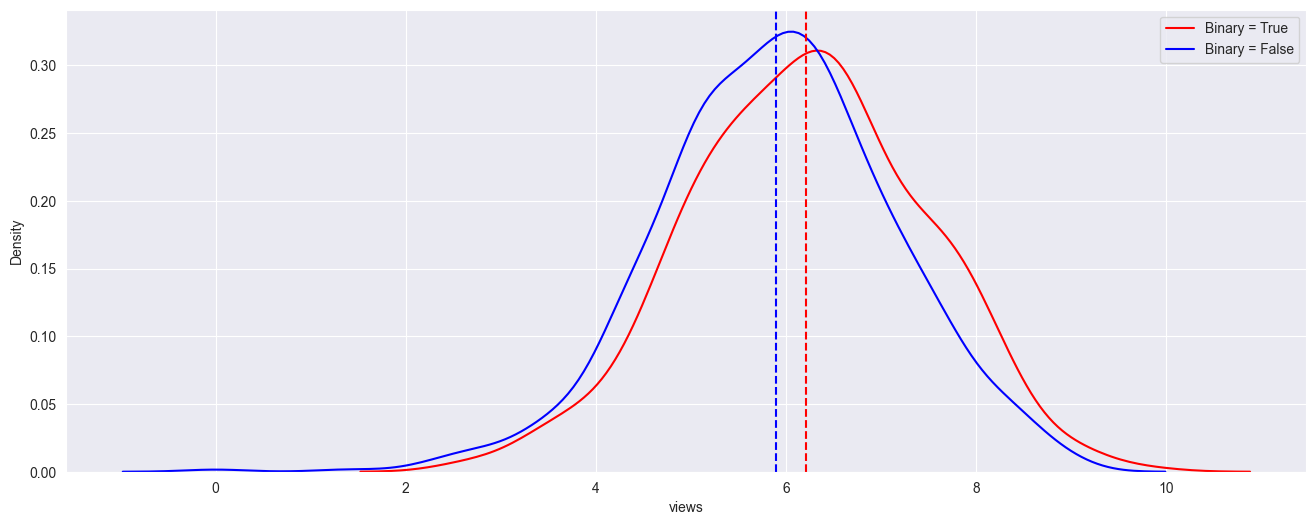

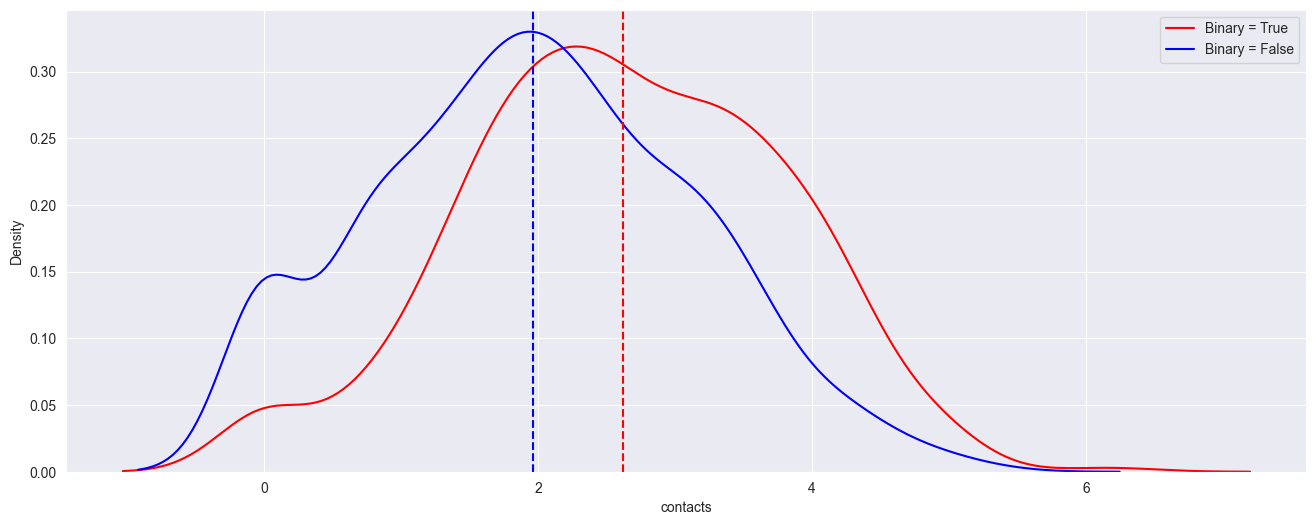

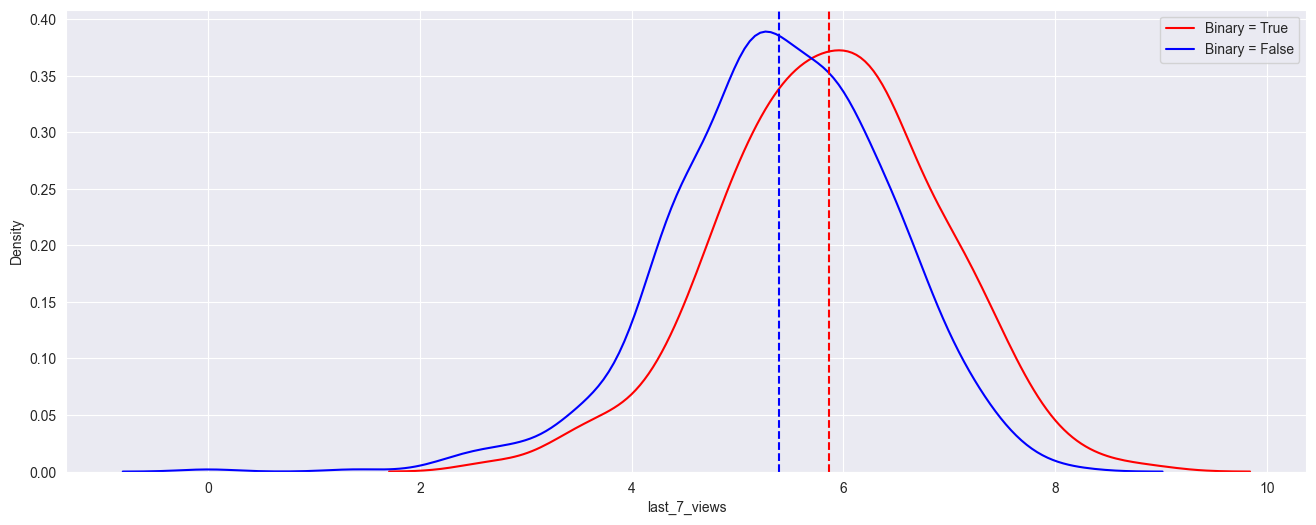

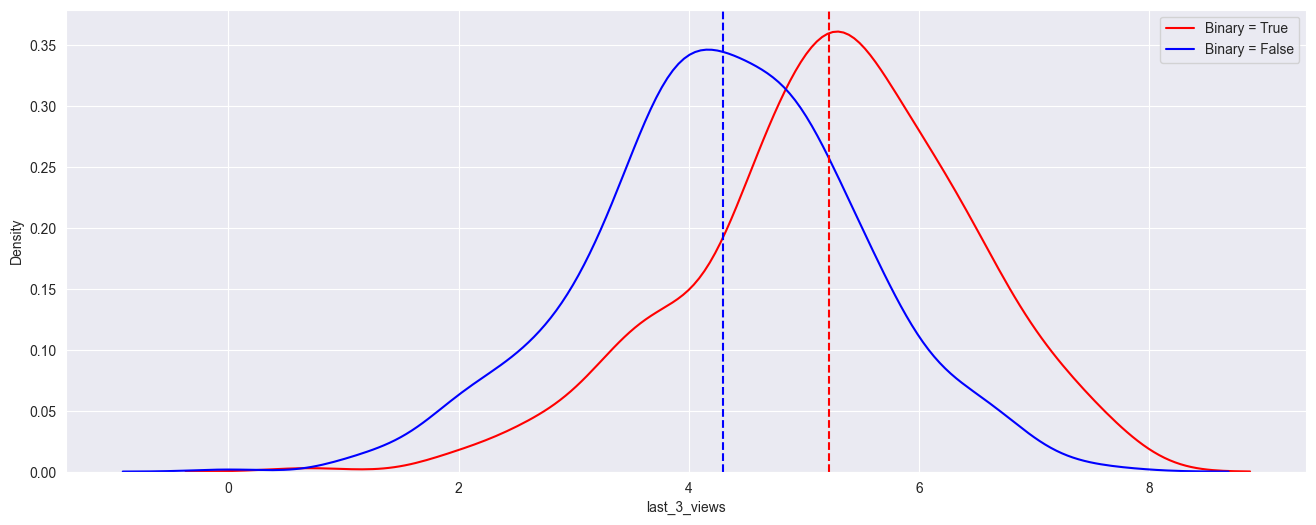

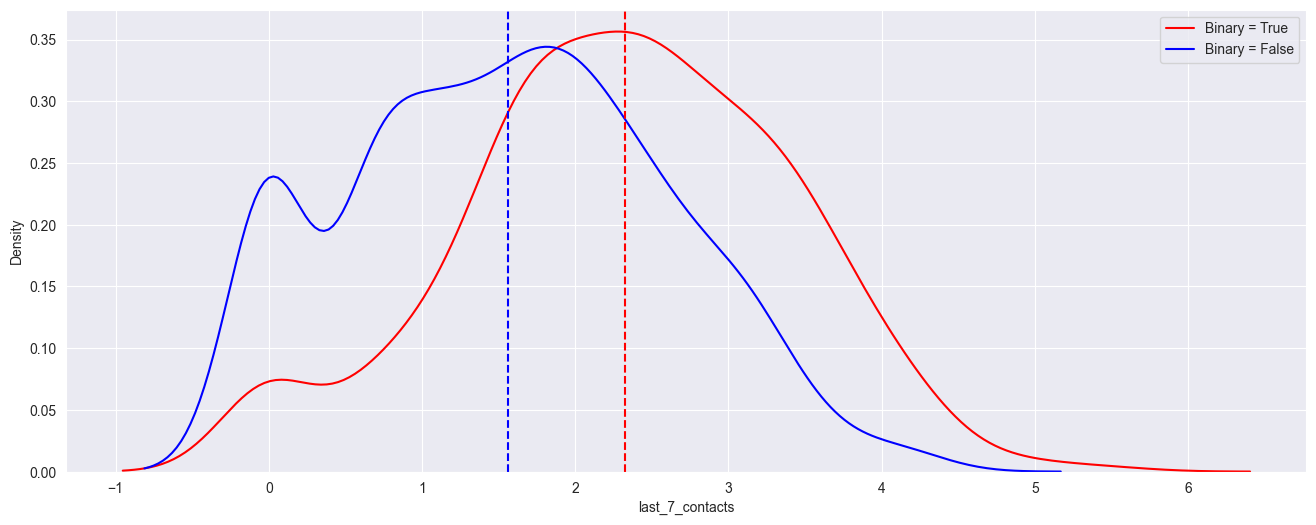

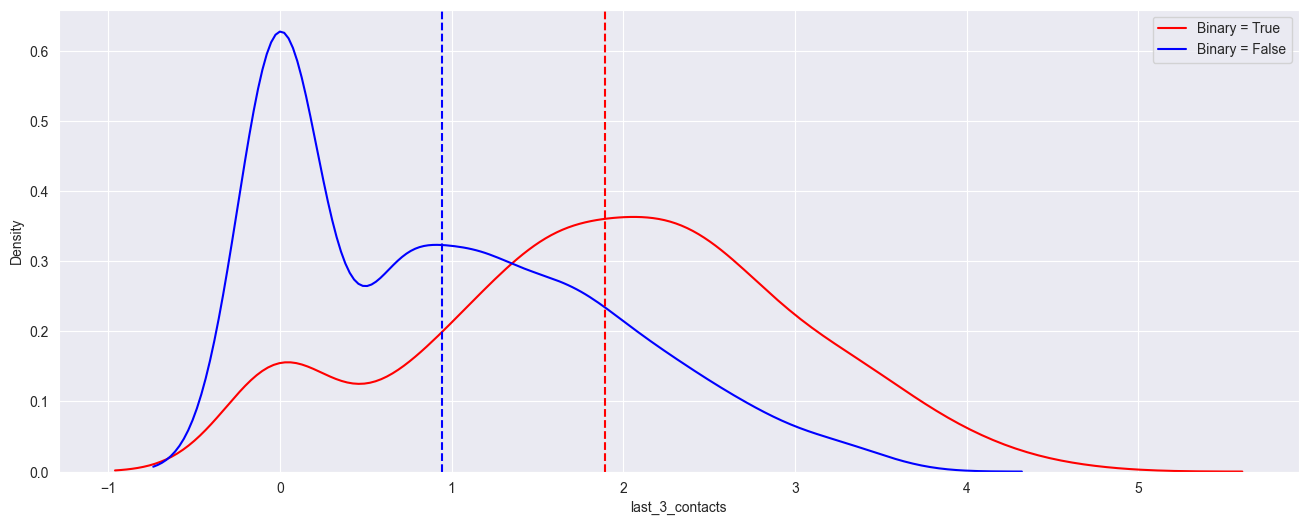

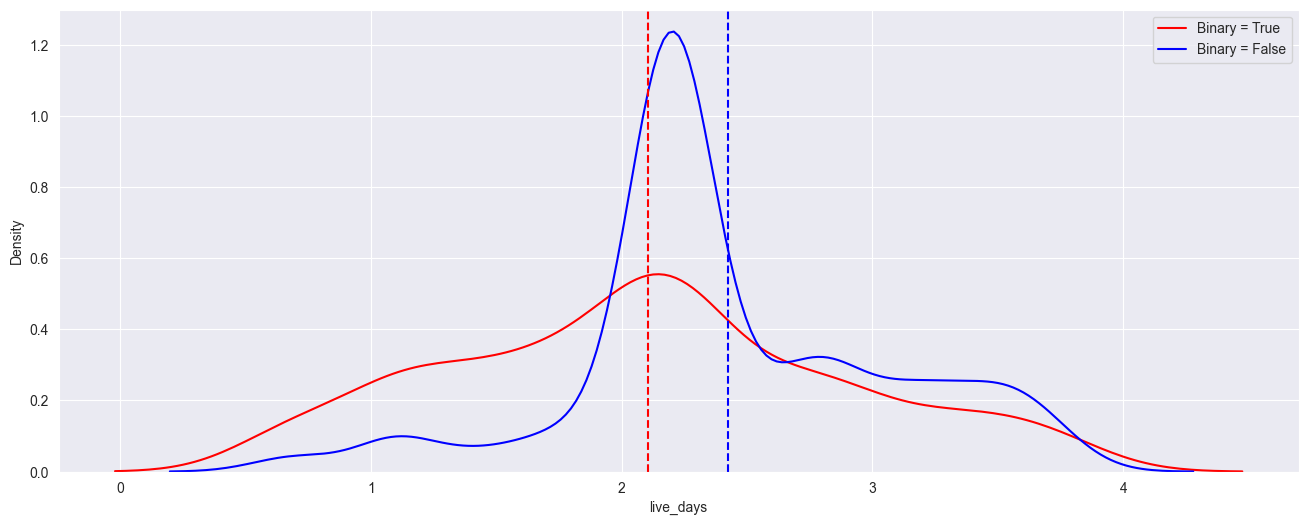

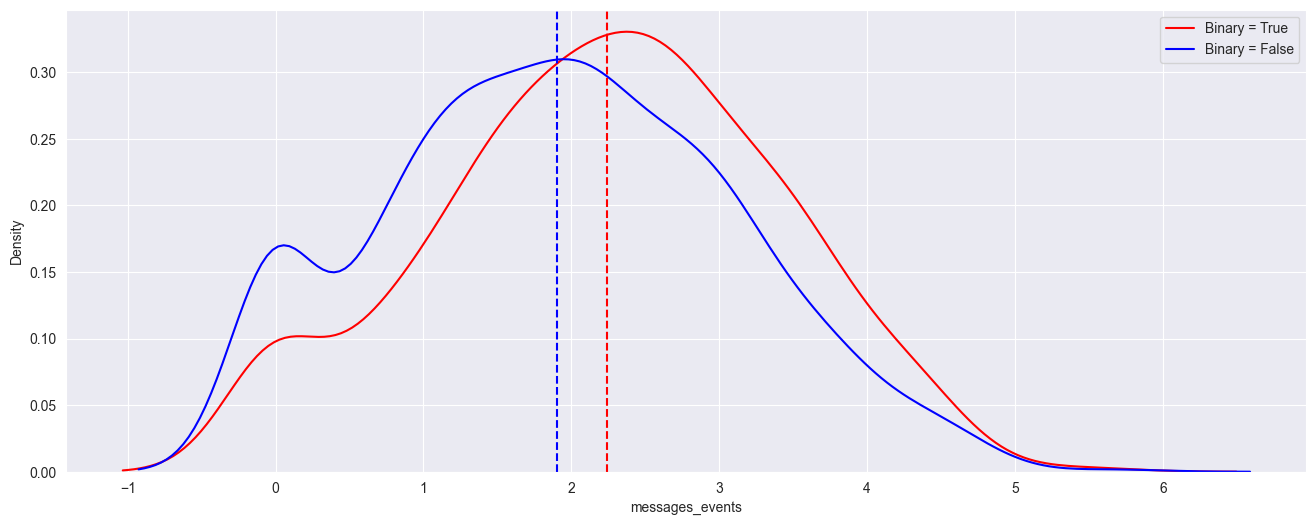

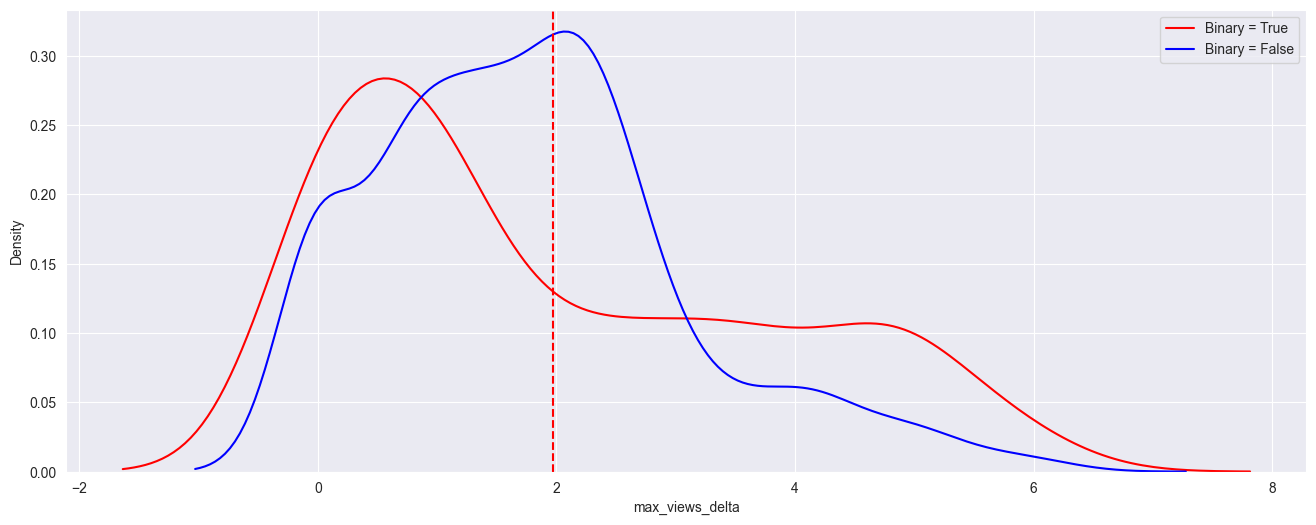

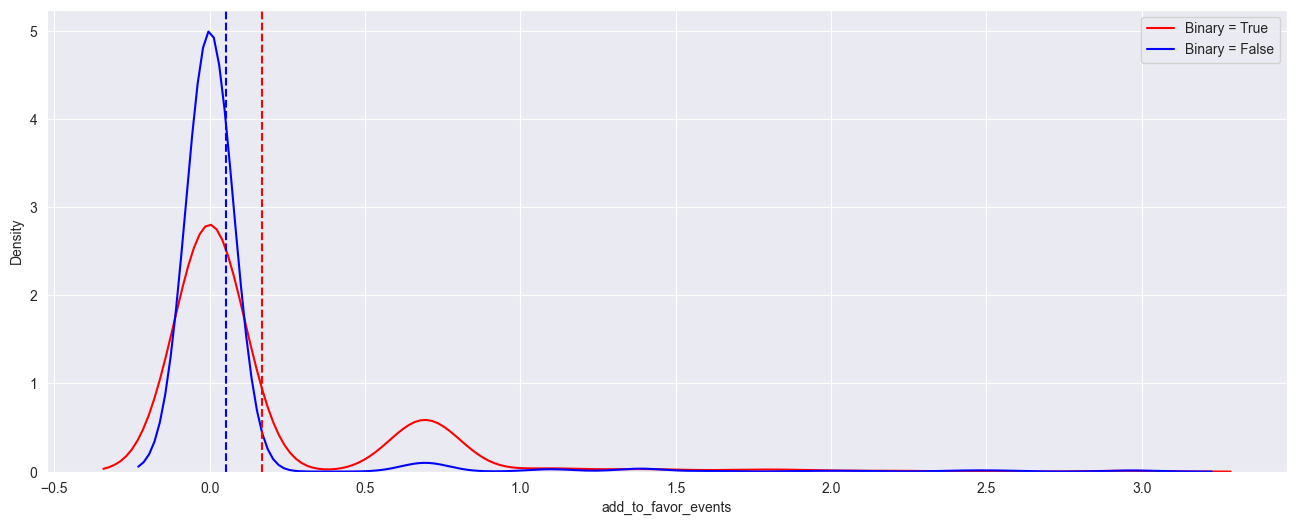

In [34]:
pb_corr = []
metrics = df.columns.tolist()[1:-1]
goal_metric = df.columns.tolist()[-1]
for metric in metrics:
    print(f"Корреляция {goal_metric} с {metric}")
    pb_corr.append({metric: find_cat_quant_correlation(quant_value=np.log(df[metric]+1),
                                               binary_mask=df[goal_metric] == 1,
                                               plot=True,
                                               print_inference=True)})
df_new = pd.dfFrame({outer_key: inner_dict
                       for d in pb_corr
                       for outer_key, inner_dict in d.items()}).T

df_new.sort_values(by='point biserial R', ascending=False)


Mean quant value for group (binary=1) = 0.0381047946162485
Mean quant value for group (binary=0) = 0.027703388239176226
Median quant value for group (binary=1) = 0.02809131261889664
Median quant value for group (binary=0) = 0.012987012987012988
Kruskal-Wallis H Test p-value = 3.654464866764808e-18
T-test p-value = 7.0879756719321e-05
point biserial correlation = 0.11477565368175352


{'point biserial R': np.float64(0.11477565368175352),
 'kruskal_pval': np.float64(3.654464866764808e-18),
 'ttest_pval': np.float64(7.0879756719321e-05)}

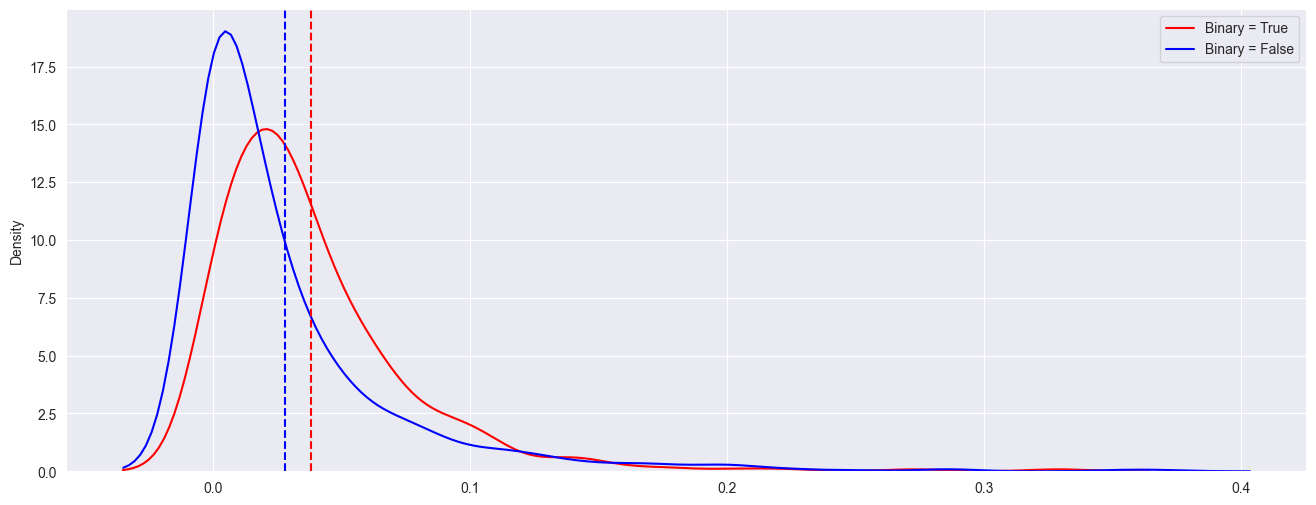

In [42]:
find_cat_quant_correlation(quant_value=(df['last_3_contacts'] / (df['last_3_views'] +1)),
                                               binary_mask=df[goal_metric] == 1,
                                               plot=True,
                                               print_inference=True)

## Пороги прокси-метрик:

In [46]:
def proxy_metrics_bins_analizer(quant_value, binary_mask, step):
    """Ищет пороги для прокси-метрики, чтобы трансформировать ее в бинарную метрику."""

    #разбиваем исходную количественную величину на квантили с нужным шагом.
    deciles_bins = np.quantile(quant_value, np.arange(0, 1, step))
    #разбиваем ряд на бины
    inds = np.digitize(quant_value, deciles_bins, right=False)
    # Агрегируем
    df = pd.dfFrame({
        'quant_value': quant_value,
        'binary': binary_mask,
        'bins': inds})
    inference = df.groupby('bins').mean()

    #считаем point biserial корреляцию
    point_biserial_R = find_cat_quant_correlation(quant_value = quant_value, binary_mask=binary_mask, plot = False, print_inference = False)['point biserial R']

    # рисуем график
    plt.figure(figsize=(12, 6))
    sns.lineplot(y = inference['quant_value'],
                 x = inference.index*step,
                 color = 'red', label = 'quant_value')
    plt.axhline(y = quant_value.median(), linestyle = '--', color = 'red')
    plt.text(x = inds.mean()*step, y = np.quantile(quant_value, 0.95),
             s='point_biserial_R = {}'.format(point_biserial_R),)
    ax2 = plt.twinx()
    sns.lineplot(y = inference['binary'], x = inference.index*step,
                 color = 'blue', ax=ax2, label = 'binary share')
    plt.axhline(y = binary_mask.mean(), linestyle = '--', color = 'blue')
    plt.legend()

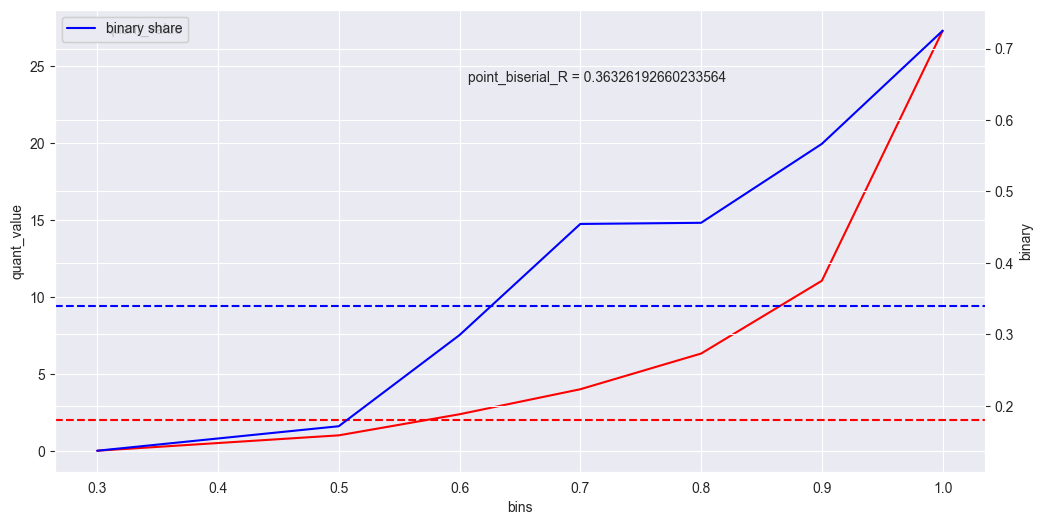

In [47]:
proxy_metrics_bins_analizer(quant_value=df['last_3_contacts'],
                            binary_mask=df[goal_metric]==1,
                            step=0.1)

## Разобрать формулы ниже:

## Перебираем пороги для максимизации корреляции между двумя бинарными метриками

In [48]:
#создадим функцию для оценки ассоциации двух бинарных переменных
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return (cramers_v)

#попробуем найти порог, при котором коэффициент ассоциации cramer V будет максимальным

def max_cramerv_corr_finder(quant_value, binary_mask, plot = True, print_inference = True, step = 1):
    '''
    quant_value - исходная количественная переменная по которой мы пытаемся найти порог
    binary_mask - бинарная метрика с целевой конверсией к которой мы исщем максимальную корреляцию
    plot - нужно ли рисовать граиф
    print_inference - нужно ли принтовать выводы
    step - размер шага с которым мы идем по quant_value и определяем пороги
    '''
    # определяем вектор исходной количественной переменной, на котором мы будет искать максимальную корреляцию
    arange = np.arange(min(quant_value), max(quant_value), step)
    cramers_v_list = []

    #циклом проходим по всем порогам и находим значение cramers_v
    for i in arange:
        confusion_matrix = pd.crosstab(binary_mask, quant_value>i)
        cramers_v_i = cramers_v(confusion_matrix.values)
        cramers_v_list.append(cramers_v_i)

    # сохраняем максимальные найденные значения корреляции и порога, при котором она достигается
    max_corr_quant_value = arange[np.argmax(np.array(cramers_v_list))]
    max_cramer_v = max(cramers_v_list)

    # отрисовываем график
    if plot:
        sns.lineplot(x = arange, y = cramers_v_list)
        plt.axhline(y = np.array(cramers_v_list).max(), linestyle = '--', color = 'red')
        plt.axvline(x = max_corr_quant_value, linestyle = '--', color = 'red')
        plt.xlabel('quant values')
        plt.ylabel('Cramer-V')

    ## принтуем выводы
    if print_inference:
        print('Maximum Cramer V =', np.array(cramers_v_list).max())
        print('Maximum Cramer V quant value = ', max_corr_quant_value)

    return({'max_cramer_v': max_cramer_v,
           'max_corr_quant_value': max_corr_quant_value})

Maximum Cramer V = 0.3672697346990414
Maximum Cramer V quant value =  3.0


{'max_cramer_v': np.float64(0.3672697346990414),
 'max_corr_quant_value': np.float64(3.0)}

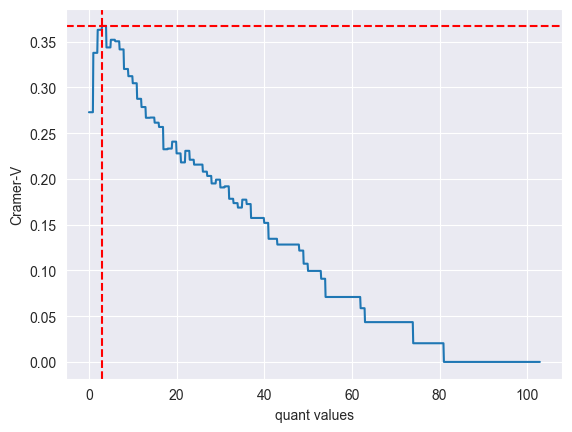

In [50]:
max_cramerv_corr_finder(df['last_3_contacts'], df[goal_metric]==1, plot = True, print_inference = True, step = 0.1)

Maximum Cramer V = 0.3486475362928702
Maximum Cramer V quant value =  151.0


{'max_cramer_v': np.float64(0.3486475362928702),
 'max_corr_quant_value': np.float64(151.0)}

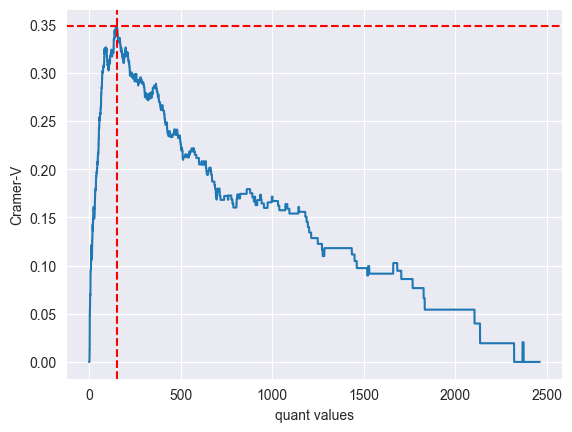

In [51]:
max_cramerv_corr_finder(df['last_3_views'], df[goal_metric]==1, plot = True, print_inference = True, step = 0.1)

## Проверка чувствительности метрики:

In [54]:
#AA test simulation on target metric
# проведем симуляцию оценки равенства долей двумя способами. Непосредственно оценку доли проданных
# и оценку тех, кто набрал 3+ контактов за период до ухода в архив

aa_binary_ztest_pvalue_list = []
aa_quant_ztest_pvalue_list = []
quant_target_level = 3
n_sim = 10000

for i in range(10000):
    sample_mask = ss.bernoulli.rvs(0.5, size=len(df)) == 1

    binary_mask_group_a = (df['is_bought']==1)[sample_mask]
    binary_mask_group_b = (df['is_bought']==1)[~sample_mask]
    quant_value_group_a = (df['last_3_contacts'])[sample_mask]
    quant_value_group_b = (df['last_3_contacts'])[~sample_mask]

    binary_nobs_group_a = len(binary_mask_group_a)
    binary_nobs_group_b = len(binary_mask_group_b)
    quant_nobs_group_a = len(quant_value_group_a)
    quant_nobs_group_b = len(quant_value_group_b)

    binary_counts_group_a = binary_mask_group_a.sum()
    binary_counts_group_b = binary_mask_group_b.sum()
    quant_counts_group_a = (quant_value_group_a >= quant_target_level).sum()
    quant_counts_group_b = (quant_value_group_b >= quant_target_level).sum()

    #проведем z-test для оценки равенства долей в двух группах
    binary_z_score_i, binary_ztest_pvalue_i = sms.proportions_ztest(count = [binary_counts_group_a, binary_counts_group_b],
                          nobs = [binary_nobs_group_a, binary_nobs_group_b])

    quant_z_score_i, quant_ztest_pvalue_i = sms.proportions_ztest(count = [quant_counts_group_a, quant_counts_group_b],
                          nobs = [quant_nobs_group_a, quant_nobs_group_b])

    aa_binary_ztest_pvalue_list.append(binary_ztest_pvalue_i)
    aa_quant_ztest_pvalue_list.append(quant_ztest_pvalue_i)

binary_alpha_ci = proportion_confint((np.array(aa_binary_ztest_pvalue_list) <= 0.05).sum(), n_sim, alpha=0.01)
quant_alpha_ci = proportion_confint((np.array(aa_quant_ztest_pvalue_list) <= 0.05).sum(), n_sim, alpha=0.01)

print('Количество случаев ложного прокраса теста при оценке доли продавших:', (np.array(aa_binary_ztest_pvalue_list) <= 0.05).sum())
print('Уровень статистической значимости оценки (доля продавших):', (np.array(aa_binary_ztest_pvalue_list) <= 0.05).sum()/n_sim)
print('99%-процентный доверительный интервал для уровня стат. значимости для целевой метрики (доля продавших)', binary_alpha_ci)
print('------------------')
print('Количество случаев ложного прокраса теста при оценке доли тех, кто набрал 3= контакта за 3 дня:',(np.array(aa_quant_ztest_pvalue_list) <= 0.05).sum())
print('Уровень статистической значимости оценки (доля набравших 3+):', (np.array(aa_quant_ztest_pvalue_list) <= 0.05).sum()/n_sim)
print('99%-процентный доверительный интервал для уровня стат. значимости для прокси метрики (доля продавших)', quant_alpha_ci)

Количество случаев ложного прокраса теста при оценке доли продавших: 492
Уровень статистической значимости оценки (доля продавших): 0.0492
99%-процентный доверительный интервал для уровня стат. значимости для целевой метрики (доля продавших) (0.043628858136235016, 0.054771141863764986)
------------------
Количество случаев ложного прокраса теста при оценке доли тех, кто набрал 3= контакта за 3 дня: 495
Уровень статистической значимости оценки (доля набравших 3+): 0.0495
99%-процентный доверительный интервал для уровня стат. значимости для прокси метрики (доля продавших) (0.04391278041997723, 0.05508721958002277)


In [57]:
#AB test simulation

ab_binary_ztest_pvalue_list = []
ab_quant_ztest_pvalue_list = []
quant_target_level = 4
abs_effect = 0.1
n_sim = 10000

for i in range(n_sim):
    sample_mask = ss.bernoulli.rvs(0.5, size=len(df)) == 1

    binary_mask_group_a = (df['is_bought']==1)[sample_mask]
    binary_mask_group_b = (df['is_bought']==1)[~sample_mask]
    quant_value_group_a = (df['last_3_contacts'])[sample_mask]
    quant_value_group_b = (df['last_3_contacts'])[~sample_mask]

    binary_nobs_group_a = len(binary_mask_group_a)
    binary_nobs_group_b = len(binary_mask_group_b)
    quant_nobs_group_a = len(quant_value_group_a)
    quant_nobs_group_b = len(quant_value_group_b)

    binary_counts_group_a = binary_mask_group_a.sum()
    binary_counts_group_b = round(binary_mask_group_b.sum()*(1+abs_effect)) #add effect
    quant_counts_group_a = (quant_value_group_a >= quant_target_level).sum()
    quant_counts_group_b = round((quant_value_group_b >= quant_target_level).sum()*(1+abs_effect)) #add effect

    binary_z_score_i, binary_ztest_pvalue_i = sms.proportions_ztest(count = [binary_counts_group_a, binary_counts_group_b],
                          nobs = [binary_nobs_group_a, binary_nobs_group_b])

    quant_z_score_i, quant_ztest_pvalue_i = sms.proportions_ztest(count = [quant_counts_group_a, quant_counts_group_b],
                          nobs = [quant_nobs_group_a, quant_nobs_group_b])

    ab_binary_ztest_pvalue_list.append(binary_ztest_pvalue_i)
    ab_quant_ztest_pvalue_list.append(quant_ztest_pvalue_i)

binary_power_ci = proportion_confint((np.array(ab_binary_ztest_pvalue_list) <= 0.05).sum(), n_sim, alpha=0.01)
quant_power_ci = proportion_confint((np.array(ab_quant_ztest_pvalue_list) <= 0.05).sum(), n_sim, alpha=0.01)

print('Effect =', abs_effect)
print('Sample size A group =', binary_nobs_group_a)
print('Sample size B group =', binary_nobs_group_b)

print('Target conversion A group = ', binary_counts_group_a / binary_nobs_group_a)
print('Target conversion B group = ', binary_counts_group_b / binary_nobs_group_b)
print('Proxy conversion A group = ', quant_counts_group_a / quant_nobs_group_a)
print('Proxy conversion B group = ', quant_counts_group_b / quant_nobs_group_b)



print('Мощность АБ-теста по целевой метрике', (np.array(ab_binary_ztest_pvalue_list) <= 0.05).sum() / n_sim)
print('99%-процентный доверительный интервал для мощности (доля продавших)', binary_alpha_ci)


print('Мощность АБ-теста по прокси метрике', (np.array(ab_quant_ztest_pvalue_list) <= 0.05).sum() / n_sim)

Effect = 0.1
Sample size A group = 606
Sample size B group = 587
Target conversion A group =  0.33663366336633666
Target conversion B group =  0.3781942078364566
Proxy conversion A group =  0.4174917491749175
Proxy conversion B group =  0.4616695059625213
Мощность АБ-теста по целевой метрике 0.245
99%-процентный доверительный интервал для мощности (доля продавших) (0.043628858136235016, 0.054771141863764986)
Мощность АБ-теста по прокси метрике 0.3134
